In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft, fftshift
import scipy.io.wavfile as reader
from scipy import signal

## FIR Filter Design

In [2]:
π = np.pi

### LS Type I FIR Filter

In [3]:
def MyLSFilter(N, ws, As):
    
    M = int((N - 1)/2) + 1 # number of taps needed for calculation
    F = np.ones((len(ws), M)) #matrix of cosines
    
    # build matrix of cosines
    for m in range(1, M):
        for wi, w in enumerate(ws):
            F[wi, m] = 2 * np.cos((w*m))
    
    # pseudoinverse
    a1 = np.dot(F.T, F)
    a2 = np.linalg.inv(a1)
    a3 = np.dot(a2, F.T)
    h1 = np.dot(a3, As)
    
    # mirror and add to form filter
    h2 = np.flip(h1)
    h = np.concatenate((h2[:-1], h1))
    return h

### Example filter

In [4]:
N = 101
L = 1000

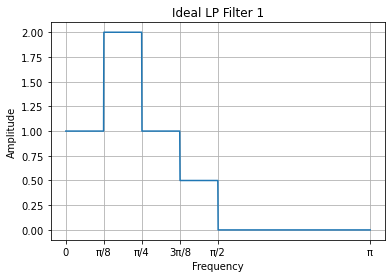

In [5]:
As = np.zeros(L)
ws = np.linspace(0, π, num=L)

for i, w in enumerate(ws):
    if 0 <= w < π/8: As[i] = 1
    elif π/8 <= w < π/4: As[i] = 2
    elif π/4 <= w < 3*π/8: As[i] = 1
    elif 3*π/8 <= w < π/2: As[i] = 0.5
    else: As[i] = 0

plt.plot(ws, As)
plt.xticks([0, π/8, π/4, 3*π/8, π/2, π],["0", "π/8", "π/4", "3π/8", "π/2", "π"])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Ideal LP Filter 1")
plt.grid()
plt.show()

#### MyLS Filter

Text(0.5, 1.0, 'LP LS Filter 1 (Time Domain)')

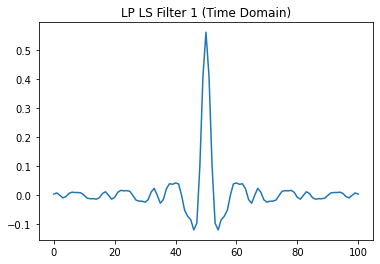

In [6]:
filt = MyLSFilter(N, ws, As)
plt.plot(filt)
plt.title("LP LS Filter 1 (Time Domain)")

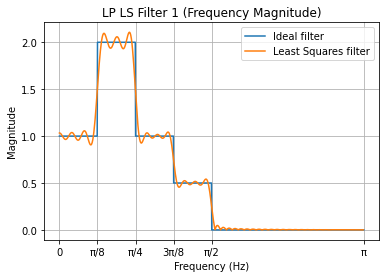

In [7]:
w, h = signal.freqz(filt)

plt.plot(ws, As, label = "Ideal filter")
plt.plot(w, np.abs(h), label = "Least Squares filter")
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xticks([0, π/8, π/4, 3*π/8, π/2, π],["0", "π/8", "π/4", "3π/8", "π/2", "π"])
plt.title("LP LS Filter 1 (Frequency Magnitude)")
plt.legend()
plt.show()

### Low Pass Filter with LS
Create a low-pass filter (LPF) using your least squares function with N = 101, L = 1000, and a cutoff frequency at π/16.

In [8]:
N = 101
L = 1000
cutoff = π/16

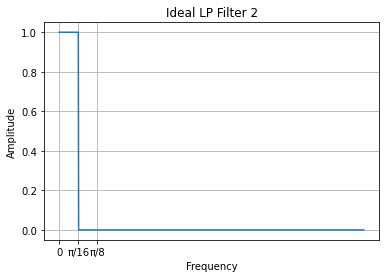

In [9]:
As = np.zeros(L)
ws = np.linspace(0, π, num=L)

for i, w in enumerate(ws):
    if 0 <= w < cutoff: As[i] = 1
    else: As[i] = 0
        
plt.plot(ws, As)
plt.xticks([0, π/16,π/8],["0", "π/16",  "π/8"])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Ideal LP Filter 2")
plt.grid()
plt.show()

#### MyLS filter 

Text(0.5, 1.0, 'Least Squares LP Filter 2 (Time Domain)')

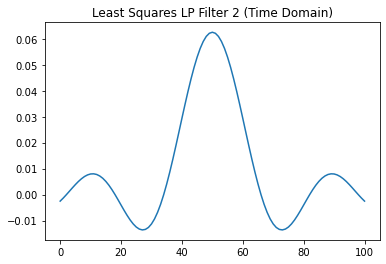

In [10]:
ls_filt = MyLSFilter(N, ws, As)
plt.plot(ls_filt)
plt.title("Least Squares LP Filter 2 (Time Domain)")

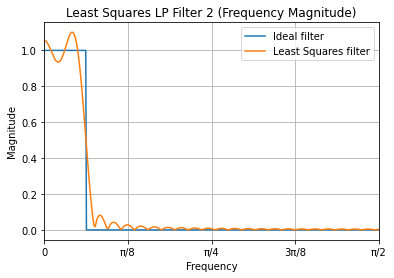

In [11]:
w, h = signal.freqz(ls_filt)
plt.plot(ws, As, label = "Ideal filter")
plt.plot(w, np.abs(h), label = "Least Squares filter")
plt.xlim(0, 0.5)
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xticks([0, π/8, π/4, 3*π/8, π/2],["0", "π/8", "π/4", "3π/8", "π/2"])
plt.title("Least Squares LP Filter 2 (Frequency Magnitude)")
plt.legend()
plt.show()

### Scipy firls filter
Compare your filter from part c to the filter generated with scipy.signal.firls using the same specifications and plot the two FREQUENCY MAGNITUDE responses on the same plot.

In [12]:
lib_ls_filt = signal.firls(N, ws/(2*π), As)

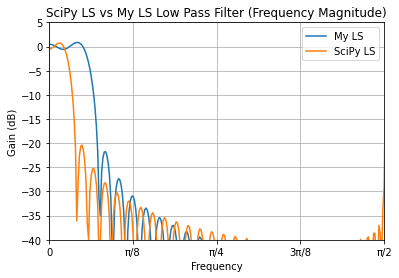

In [13]:
plt.plot(w, 20*np.log10(np.abs(h)), label= "My LS")
w, h = signal.freqz(lib_ls_filt)
plt.plot(w, 20*np.log10(np.abs(h)), label= "SciPy LS")
plt.ylim(-40, 5)
plt.xlim(0, 0.5)
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Gain (dB)')
plt.xticks([0, π/8, π/4, 3*π/8, π/2],["0", "π/8", "π/4", "3π/8", "π/2"])
plt.title("SciPy LS vs My LS Low Pass Filter (Frequency Magnitude)")
plt.legend()
plt.show()

### Corcovado with LS LPF

#### Read song

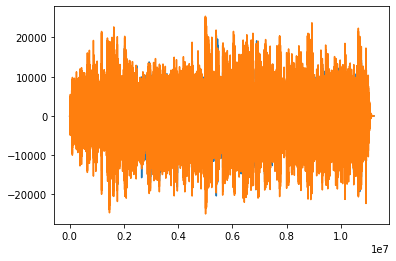

In [14]:
#Read audio file
fs_song, y_song = reader.read('./Corcovado.wav')

#Take single channel
song_ch1 = y_song[:,1].astype(np.float64)
song_ch0 = y_song[:,0].astype(np.float64)

plt.plot(song_ch0)
plt.plot(song_ch1)

#### Filter song

In [15]:
filt_song_ch0 = np.convolve(song_ch0, ls_filt)
filt_song_ch1 = np.convolve(song_ch1, ls_filt)
#sd.play(filt_song_ch1.astype('int16'))

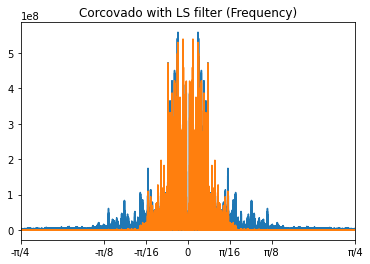

In [16]:
# plot song fft
x_song = np.linspace(-np.pi,np.pi,len(song_ch1))
corcovado_fft = np.fft.fft(song_ch1)
plt.plot(x_song,np.absolute(fftshift(corcovado_fft)))

#plot filtered song fft
x_filt = np.linspace(-np.pi,np.pi,len(filt_song_ch1))
corcovado_filt_fft = np.fft.fft(filt_song_ch1)
plt.plot(x_filt,np.absolute(fftshift(corcovado_filt_fft)))

plt.xlim(-π/4, π/4)
plt.xticks([-π/4, -π/8, -π/16, 0, π/16, π/8, π/4], ["-π/4", "-π/8", "-π/16", "0", "π/16", "π/8", "π/4"])
plt.title("Corcovado with LS filter (Frequency)")
plt.show()

### Scipy Remez filter

In [17]:
N = 101
cutoff = (π/16)/(2*π)
trans_width = (π/100)/(2*π)

Text(0.5, 1.0, 'Remez LP Filter (Time Domain)')

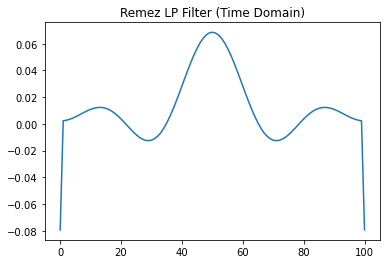

In [18]:
remez_filt = signal.remez(N, [0, cutoff, cutoff + trans_width, 1/2], [1, 0])
plt.plot(remez_filt)
plt.title("Remez LP Filter (Time Domain)")

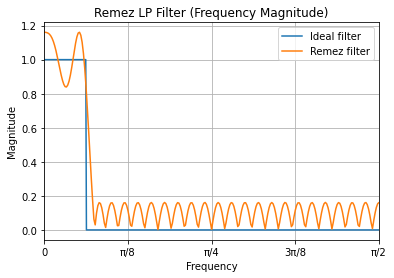

In [19]:
w, h = signal.freqz(remez_filt)
plt.plot(ws, As, label = "Ideal filter")
plt.plot(w, np.abs(h), label = "Remez filter")
plt.xlim(0, 0.5)
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xticks([0, π/8, π/4, 3*π/8, π/2],["0", "π/8", "π/4", "3π/8", "π/2"])
plt.title("Remez LP Filter (Frequency Magnitude)")
plt.legend()
plt.show()

### Corcovado with Remez LPF

#### Filter song

In [20]:
filt_song_ch0 = np.convolve(filt_song_ch0, remez_filt)
filt_song_ch1 = np.convolve(filt_song_ch1, remez_filt)

#sd.play(filt_song.astype('int16'))

#### Plot fft

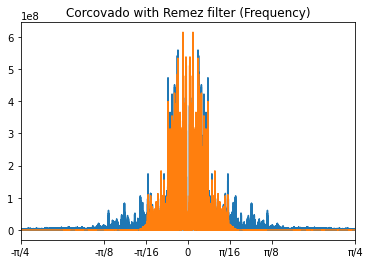

In [21]:
# plot song fft
x_song = np.linspace(-np.pi,np.pi,len(song_ch1))
corcovado_fft = np.fft.fft(song_ch1)
plt.plot(x_song,np.absolute(fftshift(corcovado_fft)))

# plot filtered song fft
x_filt = np.linspace(-np.pi,np.pi,len(filt_song_ch1))
corcovado_filt_fft = np.fft.fft(filt_song_ch1)
plt.plot(x_filt,np.absolute(fftshift(corcovado_filt_fft)))

plt.xlim(-π/4, π/4)
plt.xticks([-π/4, -π/8, -π/16, 0, π/16, π/8, π/4], ["-π/4", "-π/8", "-π/16", "0", "π/16", "π/8", "π/4"])
plt.title("Corcovado with Remez filter (Frequency)")

plt.show()